### Forward propagation

In [5]:
import numpy as np

In [81]:
sigmoid = lambda x: 1/(1 + np.exp(-x)) # sigmoid function, activation function of a neuron
dsigmoid = lambda x: sigmoid(x)*(1-sigmoid(x))
derror = lambda x,y: x - y

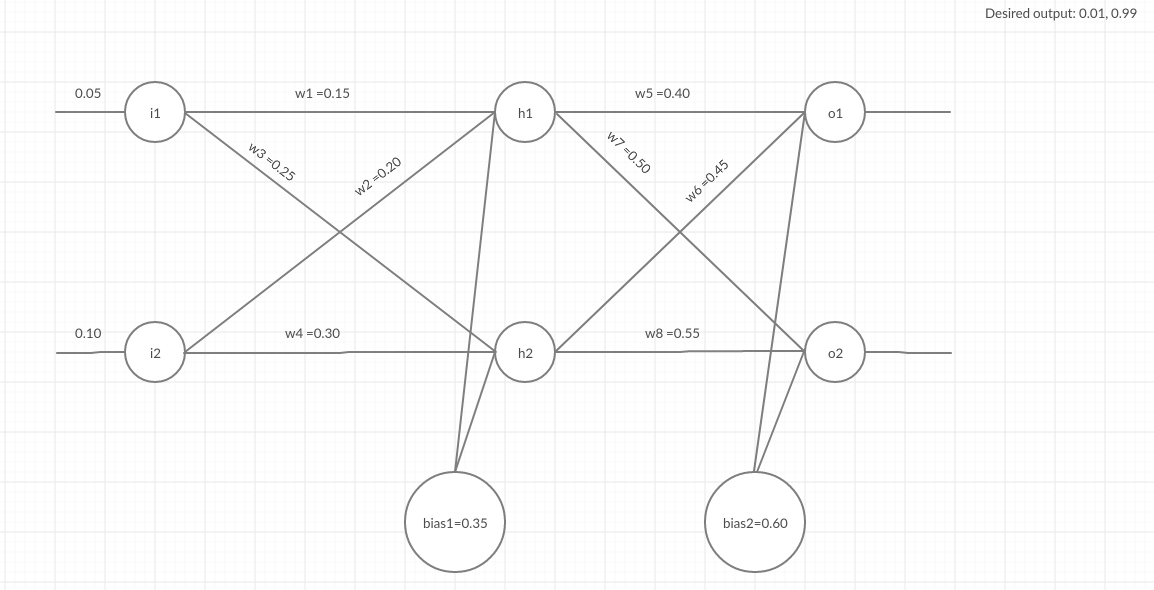

### Forward pass

In [15]:
W1 = np.array([[0.15, 0.20],[0.25, 0.30]])
bias1 = np.array([0.35,0.35]).transpose()
net_in = np.array([0.05, 0.10]).transpose()
h_input = W1.dot(net_in) + bias1
print("Input into hidden layer is:", h_input)
h_output = sigmoid(h_input)
print("Output from hidden layer is:", h_output)

Input into hidden layer is: [0.3775 0.3925]
Output from hidden layer is: [0.59326999 0.59688438]


In [23]:
W2 = np.array([[0.40,0.45],[0.50, 0.55]])
bias2 = np.array([0.60, 0.60]).transpose()
o_in = W2 @ h_output + bias2
print("Input into o-layer is:", o_in)
o_out = sigmoid(o_in)
print("Network's output is:", o_out)

Input into o-layer is: [1.10590597 1.2249214 ]
Network's output is: [0.75136507 0.77292847]


### Back pass

$$
\text{Cost function:}\\ C = \sum{\frac{1}{2}(desired - output)^2}\\
$$

$$ \text{Derivative of the cost function:}\\ \sum{(output - desired)} $$

$$ \text{Sigmoid:}\\ \sigma(x) = \frac{1}{1+e^{-x}} $$

$$
\text{Derivative of the sigmoid:}\\
\sigma(x)(1-\sigma(x))
$$

$$
\text{Weights:}\\
input_1w_1 + input_2w_2\\
input_1w_3 + input_2w_4\\
...
$$

$$
\frac{\partial C}{\partial w_5} = \frac{\partial C}{\partial o_{1_{out}}}\frac{\partial o_{1_{out}}}{\partial o_{1_{in}}}\frac{\partial o_{1_{in}}}{\partial w_5}
$$

$$
\frac{\partial C}{\partial w_5} = (output - desired)\sigma(o_{in})(1-\sigma(o_{in})h_1
$$

Learning rate used is 0.5. So the new weight will be: $ w_i = w_i - 0.5\frac{\partial C}{\partial w_i} $

In [102]:
desired = np.array([0.01, 0.99]).transpose()
dw = np.array([[derror(o_out[0],desired[0])*dsigmoid(o_in[0])*h_output[0],derror(o_out[0],desired[0])*dsigmoid(o_in[0])*h_output[1]]
          ,[derror(o_out[1],desired[1])*dsigmoid(o_in[1])*h_output[0],derror(o_out[1],desired[1])*dsigmoid(o_in[1])*h_output[1]]])
print("New weights of W2:\n",W2 - 0.5*dw)

New weights of W2:
 [[0.35891648 0.40866619]
 [0.51130127 0.56137012]]


### Weights of the first layer, before the hidden layer

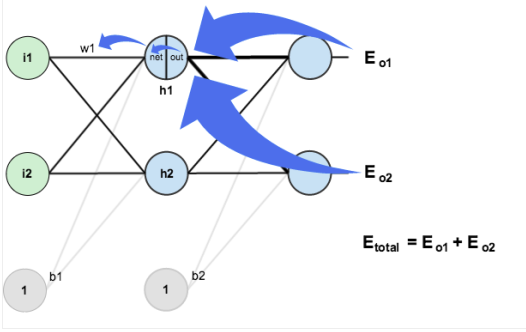

$$
\frac{\partial C}{\partial w_1} = (\frac{\partial E_{o1}}{\partial h1_{out}} + \frac{\partial E_{o2}}{\partial h1_{out}})\frac{\partial h1_{out}}{\partial h1_{net}}\frac{\partial h1_{net}}{\partial w_1}
$$